# Analyzing the Temporal Effect of Unemployment Rate Change on the Occurrence of Recessions

# Overview

>This research project investigates the lead-lag relationship between changes in the unemployment rate and economic recessions, aiming to determine whether unemployment rate changes precede or follow recessions. The study also explores the variation of this relationsip within the sectors of construction, manufacturing, and individuals holding a degree of bachelor's or higher. A variety of statistical techniques were utilized thoroughout the study, including time lag analysis with Pearson's correlation coefficient, Vector Autoregression model, Logistic Regression model, Augmented Dickey-Fuller test, Granger causality test, impulse response function analysis, and prediction forecasting.

>Understanding the relationship between unemployment rate changes and recessions has significant implications for policymakers in formulating appropriate strategies to mitigate the negative impact of recessions. Overall, this research provides insights into the understanding of this temporal relationship, contributing to this understanding and policy-making processes.

>Overall, we suspect that changes in the unemployment rate will have a temporal effect on the occurrence of recessions, with variations observed across different sectors and educational backgrounds.

<a id='research_question'></a>
# Research Question

>*To what extent do changes in the unemployment rate lead or lag behind the occurrence of economic recessions, and how does this relationship differ with groups in construction, manufactoring and with degrees?*

<a id='background'></a>

## Background & Prior Work

>Unemployment rates and economic recessions are central areas of interest in macroeconomics, with unemployment often viewed as a lagging indicator of economic recessions. The relationship between unemployment rates and recessions has significant implications for monetary policy, fiscal policy, and industry planning. The potential variability of this relationship across different industries adds an additional layer of complexity, highlighting the impacts of recessions.

>Changes in the unemployment rate lag behind the start of economic recessions, supporting the general> consensus that unemployment is a lagging indicator.[1] A more recent study looked at the impact of the COVID-19 recession on different industry sectors. The study indicates that the impact of recessions can vary significantly by industry, with service sectors like hospitality and travel experiencing more severe impacts.[2]

>Both studies provide valuable insights into the relationship between unemployment and recessions and the differential impacts across sectors. However, there is a need for more nuanced research that explicitly explores the lead or lag nature of unemployment rates relative to recessions in various sectors. This proposed study intends to fill this gap by providing a comprehensive analysis of the lead-lag relationship between unemployment rates and economic recessions across various industry sectors.

References

> 1) Valletta, R. (2005). The Ins and Outs of Poverty in Advanced Economies: Government Policy and Poverty Dynamics in Canada, Germany, Great Britain, and the United States. Review of Income and Wealth (https://www150.statcan.gc.ca/n1/pub/75f0002m/75f0002m2005001-eng.pdf)
    
> 2) Cajner, T., Crane, L. D., Decker, R. A., Grigsby, J., Hamins-Puertolas, A., Hurst, E., Kurz, C., & Yildirmaz, A. (2020). The U.S. labor market during the beginning of the pandemic recession. Brookings Papers on Economic Activity (https://www.brookings.edu/wp-content/uploads/2020/06/Cajner-et-al-Conference-Draft.pdf)

# Hypothesis


> We hypothesize that changes in the unemployment rate exhibit a temporal relationship with the occurence of economic recessions. Specifically, we expect that increases in the unemployment rate will generally precede recessions, indicating a leading effect. Conversely, we anticipate that decreases in the unemployment rate will typically follow the end of recessions, suggesting a lagging effect. To shorten, we suspect a lead effect for increases and a lag effect for decreases in unemployment.

> Furthermore, we hypothesize that the temporal relationship varies across different sectors, such as construction, manufacturing, and individuals who hold degrees.

# Datasets

- Dataset Name:  NBER based Recession Indicators for the United States from the Period following the Peak through the Trough

- Link to the dataset: https://fred.stlouisfed.org/series/USREC
- Number of observations: 2021

>This dateset gives recession indicators based on NBER data for the United States from 1854 to 2023. A value of 1 indicates a recession and a value of 0 indicates there is not a recession occuring.

- Dataset Name: Unemployment Rate

- Link to dataset: https://fred.stlouisfed.org/series/UNRATE
- Number of observations: 905

>The Employment Status dataset describes the unemployment rate within the US every year. The dataset looks at unemployment monthly from 1948 all the way up to April 2023 and gives the unemployment rate as a percentage.
By combining datasets from GDP and employment status, and analyzing the historical patterns and trends in key economic indicators across different economic cycles. Through observing the datasets, there will be many indicators that can be used to predict where the economic recessions might take place and other variables that might show the overall economy as it adapts a downward trend. When we look at the average trend of these indicators throughout the year, we can start to see if the trend is going downwards or upwards.

- Dataset Name: Unemployment Rate - Construction Industry, Private Wage and Salary Workers

- Link to dataset: https://fred.stlouisfed.org/series/LNU04032231
- Number of observations: 879

>Similar to general unemployment rate dataset, this dataset has monthly observations of the unemployment rate but specifically from construction employees including "working supervisors, qualified craft workers, mechanics, apprentices, helpers, laborers, and so forth, engaged in new work, alterations, demolition, repair, maintenance, and the like, whether working at the site of construction or in shops or yards at jobs (such as precutting and preassembling) ordinarily performed by members of the construction trades." (U.S Bureau of Labor Statistics)

- Dataset Name: Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over

- Link to dataset: https://fred.stlouisfed.org/series/LNS14027662
- Number of observations: 339

> Similar to general unemployment rate dataset, this dataset has monthly observations of the unemployment rate but specifically from Bachelor's Degree holders and Higher, 25 Yrs. & over.

- Dataset Name: Unemployment Rate - Manufacturing Industry, Private Wage and Salary Workers
- Link to dataset: https://fred.stlouisfed.org/series/LNU04032232
- Number of observations: 219
> Similar to general unemployment rate dataset, this dataset has monthly observations of the unemployment rate but specifically from the manufacturing industry.


# Setup

In [1]:
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats

import numpy as np
import pandas as pd

import seaborn as sns
sns.set(font_scale=1.2, style="white")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)
%config InlineBackend.figure_format ='retina'
import matplotlib.patches as mpatches

# Data Cleaning

>We first will import the recession and unemployment data and renamed their columns appropriately as FRED has their own system for naming.

In [2]:
#Importing data of recession dates from FRED
recession_data = pd.read_csv("usrecession.csv")
recession_data

,DATE,USREC
0,1854-12-01,1
1,1855-01-01,0
2,1855-02-01,0
3,1855-03-01,0
4,1855-04-01,0
...,...,...
2016,2022-12-01,0
2017,2023-01-01,0
2018,2023-02-01,0
2019,2023-03-01,0


>Imporant to note that the recession data being collected is categorical and does not display the gradual nature of recessions but rather an instantaneous manifestation from no recession to the occurence of a recession.

In [3]:
#Renaming columns
recession_data = recession_data.rename(columns = {"USREC" : "recession_value", "DATE" : "date"})

In [4]:
#Importing data about unemployment rate from FRED
unemployment = pd.read_csv("unrate.csv")
unemployment

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
899,2022-12-01,3.5
900,2023-01-01,3.4
901,2023-02-01,3.6
902,2023-03-01,3.5


>While our recession data is categorical, the unemployment rate data contains continuous percentages.

In [5]:
#Renaming the columns
unemployment = unemployment.rename(columns = {"DATE": "date", "UNRATE" : "unemployment_rate"})

>Now that we have both of the separate datasets, we can work on merging them. After they are merged, we create a column for unemployment rate change (change of current unemployment rate from previous recording) which will be used to create lagged unemployment rate change columns for us to conduct out time lag analyis with Pearson's correlation coefficients. We then check the merged DataFrame for unavailable values and ensure it is sorted by the date index.

In [6]:
#Adding a column for the change in the rate of unemployment
unemployment["unemployment_rate_change"] = unemployment["unemployment_rate"].pct_change()

#Combining the unemployment data with the recession data
merged_df = unemployment.merge(recession_data[["date", "recession_value"]], on = "date", how = "left")
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df.set_index('date', inplace=True)

#Adding a lagged unemployment rate column to display the previous row's unemployment rate, for each row
lags = range(-12, 13)
for lag in lags:
    merged_df["lagged_unemployment_rate_change{}".format(lag)] = merged_df['unemployment_rate_change'].shift(lag)

#Removing all NA values
merged_df = merged_df.dropna()

#Making sure the dataframe is sorted in order
merged_df = merged_df.sort_values("date")

merged_df

,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
date,,,,,,,,,,,,,,,,,,,,,
1949-02-01,4.7,0.093023,1,-0.015385,-0.015152,0.031250,-0.189873,0.196970,-0.029412,0.014925,...,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564,-0.025000,0.052632,0.117647
1949-03-01,5.0,0.063830,1,-0.015625,-0.015385,-0.015152,0.031250,-0.189873,0.196970,-0.029412,...,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564,-0.025000,0.052632
1949-04-01,5.3,0.060000,1,-0.079365,-0.015625,-0.015385,-0.015152,0.031250,-0.189873,0.196970,...,0.075000,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564,-0.025000
1949-05-01,6.1,0.150943,1,-0.051724,-0.079365,-0.015625,-0.015385,-0.015152,0.031250,-0.189873,...,0.093023,0.075000,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564
1949-06-01,6.2,0.016393,1,-0.018182,-0.051724,-0.079365,-0.015625,-0.015385,-0.015152,0.031250,...,0.063830,0.093023,0.075000,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,3.9,-0.071429,0,-0.027778,-0.027027,0.057143,-0.054054,0.057143,-0.027778,0.000000,...,-0.076923,-0.037037,-0.084746,0.017241,-0.049180,0.000000,-0.016129,-0.015873,-0.059701,0.000000
2022-01-01,4.0,0.025641,0,-0.028571,-0.027778,-0.027027,0.057143,-0.054054,0.057143,-0.027778,...,-0.062500,-0.076923,-0.037037,-0.084746,0.017241,-0.049180,0.000000,-0.016129,-0.015873,-0.059701
2022-02-01,3.8,-0.050000,0,0.058824,-0.028571,-0.027778,-0.027027,0.057143,-0.054054,0.057143,...,-0.066667,-0.062500,-0.076923,-0.037037,-0.084746,0.017241,-0.049180,0.000000,-0.016129,-0.015873


In [7]:
print("Infinite values exist: ", np.isinf(merged_df.values).any())
print("NaN values exist: ", merged_df.isna().any().any())

Infinite values exist:  False
NaN values exist:  False


>Now we import the data for the unemployment rate by specfic sectors of work. Again, we are  looking at construction workers, manufacturing, and individuals who hold degrees (bachelors and higher).

>We will conduct the same cleaning steps as done for the other datasets: read file, rename columns, add rate change column, set index as the date, remove any na values, and finally ensure the dataframe is sorted by the date

In [8]:
construction = pd.read_csv("construction.csv")
construction = construction.rename(columns = {"DATE": "date", "LNU04032231" : "unemployment_rate"})
construction["unemployment_rate_change"] = construction["unemployment_rate"].pct_change()
construction['date'] = pd.to_datetime(construction['date'])
construction.set_index('date', inplace=True)
construction = construction.dropna()
construction = construction.sort_values("date")
construction["recession_value"] = merged_df["recession_value"]


for lag in lags:
    construction["lagged_unemployment_rate_change{}".format(lag)] = construction['unemployment_rate_change'].shift(lag)

construction = construction.dropna()
construction = construction.sort_values("date")

In [9]:
construction

,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
date,,,,,,,,,,,,,,,,,,,,,
2001-02-01,9.9,0.010204,0.0,-0.102941,0.511111,0.184211,0.245902,0.109091,-0.051724,0.183673,...,0.163265,0.065217,-0.098039,0.159091,-0.043478,-0.080000,-0.137931,-0.333333,-0.179245,0.092784
2001-03-01,8.4,-0.151515,0.0,-0.032787,-0.102941,0.511111,0.184211,0.245902,0.109091,-0.051724,...,0.192982,0.163265,0.065217,-0.098039,0.159091,-0.043478,-0.080000,-0.137931,-0.333333,-0.179245
2001-04-01,7.1,-0.154762,1.0,-0.144068,-0.032787,-0.102941,0.511111,0.184211,0.245902,0.109091,...,0.441176,0.192982,0.163265,0.065217,-0.098039,0.159091,-0.043478,-0.080000,-0.137931,-0.333333
2001-05-01,5.6,-0.211268,1.0,-0.267327,-0.144068,-0.032787,-0.102941,0.511111,0.184211,0.245902,...,0.010204,0.441176,0.192982,0.163265,0.065217,-0.098039,0.159091,-0.043478,-0.080000,-0.137931
2001-06-01,5.1,-0.089286,1.0,-0.067568,-0.267327,-0.144068,-0.032787,-0.102941,0.511111,0.184211,...,-0.151515,0.010204,0.441176,0.192982,0.163265,0.065217,-0.098039,0.159091,-0.043478,-0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,5.0,0.063830,0.0,0.128205,-0.048780,0.205882,-0.128205,0.114286,-0.054054,-0.026316,...,-0.021739,-0.245902,-0.186667,0.119403,-0.129870,-0.104651,-0.104167,0.021277,-0.020833,0.315068
2022-01-01,7.1,0.420000,0.0,0.568182,0.128205,-0.048780,0.205882,-0.128205,0.114286,-0.054054,...,-0.111111,-0.021739,-0.245902,-0.186667,0.119403,-0.129870,-0.104651,-0.104167,0.021277,-0.020833
2022-02-01,6.7,-0.056338,0.0,-0.043478,0.568182,0.128205,-0.048780,0.205882,-0.128205,0.114286,...,0.175000,-0.111111,-0.021739,-0.245902,-0.186667,0.119403,-0.129870,-0.104651,-0.104167,0.021277


In [10]:
print("Infinite values exist: ", np.isinf(construction.values).any())
print("NaN values exist: ", construction.isna().any().any())
construction.describe()

Infinite values exist:  False
NaN values exist:  False


,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,9.503922,0.009667,0.109804,0.008004,0.011059,0.012375,0.013510,0.011710,0.011004,0.011916,...,0.014339,0.012948,0.012313,0.012251,0.012516,0.012288,0.012711,0.012136,0.010965,0.011838
std,4.833005,0.172095,0.313260,0.172625,0.174605,0.174640,0.175215,0.171819,0.171708,0.172006,...,0.173931,0.172083,0.172193,0.172137,0.171998,0.172082,0.171577,0.172491,0.172773,0.172621
min,3.200000,-0.323077,0.000000,-0.323077,-0.323077,-0.323077,-0.323077,-0.323077,-0.323077,-0.323077,...,-0.323077,-0.323077,-0.323077,-0.323077,-0.323077,-0.323077,-0.323077,-0.333333,-0.333333,-0.333333
25%,6.000000,-0.094952,0.000000,-0.096464,-0.094952,-0.093578,-0.093578,-0.093578,-0.093578,-0.093578,...,-0.093000,-0.093000,-0.093578,-0.093578,-0.093000,-0.093000,-0.093000,-0.093000,-0.093578,-0.093000
50%,8.000000,-0.020833,0.000000,-0.021739,-0.021739,-0.020833,-0.020690,-0.020690,-0.020833,-0.020690,...,-0.014815,-0.014815,-0.017341,-0.017341,-0.017341,-0.017341,-0.017341,-0.017341,-0.020690,-0.017341
75%,11.800000,0.093953,0.000000,0.092238,0.093953,0.095247,0.096154,0.096154,0.095247,0.096154,...,0.096660,0.096154,0.096154,0.096154,0.096154,0.096154,0.096154,0.096154,0.095247,0.095247
max,27.100000,1.405797,1.000000,1.405797,1.405797,1.405797,1.405797,1.405797,1.405797,1.405797,...,1.405797,1.405797,1.405797,1.405797,1.405797,1.405797,1.405797,1.405797,1.405797,1.405797


In [11]:
manufacturing = pd.read_csv("manufactoring.csv")
manufacturing = manufacturing.rename(columns = {"DATE": "date", "LNU04032232" : "unemployment_rate"})
manufacturing["unemployment_rate_change"] = manufacturing["unemployment_rate"].pct_change()
manufacturing['date'] = pd.to_datetime(manufacturing['date'])
manufacturing.set_index('date', inplace=True)
manufacturing = manufacturing.dropna()
manufacturing = manufacturing.sort_values("date")
manufacturing["recession_value"] = merged_df["recession_value"]

for lag in lags:
    manufacturing["lagged_unemployment_rate_change{}".format(lag)] = manufacturing['unemployment_rate_change'].shift(lag)

manufacturing = manufacturing.dropna()
manufacturing = manufacturing.sort_values("date")

In [12]:
manufacturing

,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
date,,,,,,,,,,,,,,,,,,,,,
2001-02-01,4.6,0.000000,0.0,-0.054054,0.174603,0.050000,0.034483,0.074074,-0.018182,-0.017857,...,-0.055556,0.058824,0.000000,-0.055556,0.161290,-0.088235,-0.081081,0.027778,0.058824,-0.055556
2001-03-01,4.9,0.065217,0.0,0.042857,-0.054054,0.174603,0.050000,0.034483,0.074074,-0.018182,...,-0.029412,-0.055556,0.058824,0.000000,-0.055556,0.161290,-0.088235,-0.081081,0.027778,0.058824
2001-04-01,4.4,-0.102041,1.0,-0.013699,0.042857,-0.054054,0.174603,0.050000,0.034483,0.074074,...,0.393939,-0.029412,-0.055556,0.058824,0.000000,-0.055556,0.161290,-0.088235,-0.081081,0.027778
2001-05-01,4.7,0.068182,1.0,-0.083333,-0.013699,0.042857,-0.054054,0.174603,0.050000,0.034483,...,0.000000,0.393939,-0.029412,-0.055556,0.058824,0.000000,-0.055556,0.161290,-0.088235,-0.081081
2001-06-01,5.0,0.063830,1.0,0.000000,-0.083333,-0.013699,0.042857,-0.054054,0.174603,0.050000,...,0.065217,0.000000,0.393939,-0.029412,-0.055556,0.058824,0.000000,-0.055556,0.161290,-0.088235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,2.8,-0.096774,0.0,-0.333333,-0.129032,0.107143,-0.151515,0.031250,0.066667,0.071429,...,0.083333,-0.142857,-0.222222,0.125000,-0.172414,0.115385,0.083333,0.021277,0.093023,-0.085106
2022-01-01,3.6,0.285714,0.0,0.444444,-0.333333,-0.129032,0.107143,-0.151515,0.031250,0.066667,...,-0.153846,0.083333,-0.142857,-0.222222,0.125000,-0.172414,0.115385,0.083333,0.021277,0.093023
2022-02-01,3.2,-0.111111,0.0,0.153846,0.444444,-0.333333,-0.129032,0.107143,-0.151515,0.031250,...,-0.060606,-0.153846,0.083333,-0.142857,-0.222222,0.125000,-0.172414,0.115385,0.083333,0.021277


In [13]:
print("Infinite values exist: ", np.isinf(manufacturing.values).any())
print("NaN values exist: ", manufacturing.isna().any().any())
manufacturing.describe()

Infinite values exist:  False
NaN values exist:  False


,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,5.826275,0.007235,0.109804,0.005493,0.006313,0.006639,0.006171,0.004719,0.005955,0.006391,...,0.008878,0.007988,0.008368,0.008388,0.009624,0.008951,0.009193,0.010173,0.009914,0.010372
std,2.471470,0.168904,0.313260,0.172814,0.173120,0.173123,0.172885,0.170731,0.169410,0.169204,...,0.170505,0.169645,0.169518,0.169510,0.169471,0.169518,0.169344,0.168722,0.168595,0.168256
min,2.300000,-0.233333,0.000000,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.233333,-0.233333,...,-0.233333,-0.233333,-0.233333,-0.233333,-0.233333,-0.233333,-0.233333,-0.233333,-0.233333,-0.233333
25%,4.050000,-0.068706,0.000000,-0.069767,-0.069767,-0.069767,-0.069767,-0.069767,-0.069606,-0.069338,...,-0.065341,-0.065341,-0.061553,-0.061553,-0.059715,-0.061553,-0.061553,-0.059715,-0.059715,-0.057502
50%,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.800000,0.050000,0.000000,0.048200,0.049390,0.050000,0.049390,0.049390,0.049390,0.049390,...,0.050641,0.050641,0.050641,0.050641,0.051957,0.050641,0.050641,0.050641,0.050641,0.050641
max,13.200000,2.219512,1.000000,2.219512,2.219512,2.219512,2.219512,2.219512,2.219512,2.219512,...,2.219512,2.219512,2.219512,2.219512,2.219512,2.219512,2.219512,2.219512,2.219512,2.219512


In [14]:
degrees = pd.read_csv("bachelors.csv")
degrees = degrees.rename(columns = {"DATE": "date", "LNS14027662" : "unemployment_rate"})
degrees["unemployment_rate_change"] = degrees["unemployment_rate"].pct_change()
degrees['date'] = pd.to_datetime(degrees['date'])
degrees.set_index('date', inplace=True)
degrees = degrees.dropna()
degrees = degrees.sort_values("date")
degrees["recession_value"] = merged_df["recession_value"]

for lag in lags:
    degrees["lagged_unemployment_rate_change{}".format(lag)] = degrees['unemployment_rate_change'].shift(lag)
    
degrees = degrees.dropna()
degrees = degrees.sort_values("date")

In [15]:
degrees

,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
date,,,,,,,,,,,,,,,,,,,,,
1993-02-01,3.2,0.032258,0.0,-0.034483,0.035714,-0.034483,0.000000,0.035714,0.076923,-0.071429,...,0.030303,0.031250,0.066667,-0.032258,-0.031250,0.000000,0.000000,0.103448,-0.093750,0.032258
1993-03-01,3.2,0.000000,0.0,0.000000,-0.034483,0.035714,-0.034483,0.000000,0.035714,0.076923,...,-0.029412,0.030303,0.031250,0.066667,-0.032258,-0.031250,0.000000,0.000000,0.103448,-0.093750
1993-04-01,3.2,0.000000,0.0,-0.107143,0.000000,-0.034483,0.035714,-0.034483,0.000000,0.035714,...,-0.060606,-0.029412,0.030303,0.031250,0.066667,-0.032258,-0.031250,0.000000,0.000000,0.103448
1993-05-01,3.0,-0.062500,0.0,0.000000,-0.107143,0.000000,-0.034483,0.035714,-0.034483,0.000000,...,0.032258,-0.060606,-0.029412,0.030303,0.031250,0.066667,-0.032258,-0.031250,0.000000,0.000000
1993-06-01,2.9,-0.033333,0.0,0.040000,0.000000,-0.107143,0.000000,-0.034483,0.035714,-0.034483,...,0.000000,0.032258,-0.060606,-0.029412,0.030303,0.031250,0.066667,-0.032258,-0.031250,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,2.1,-0.045455,0.0,-0.050000,0.052632,0.055556,-0.052632,-0.050000,-0.047619,0.050000,...,-0.107143,-0.096774,-0.088235,0.096774,-0.114286,-0.054054,-0.026316,-0.050000,0.052632,-0.095238
2022-01-01,2.3,0.095238,0.0,0.052632,-0.050000,0.052632,0.055556,-0.052632,-0.050000,-0.047619,...,-0.040000,-0.107143,-0.096774,-0.088235,0.096774,-0.114286,-0.054054,-0.026316,-0.050000,0.052632
2022-02-01,2.2,-0.043478,0.0,0.000000,0.052632,-0.050000,0.052632,0.055556,-0.052632,-0.050000,...,-0.083333,-0.040000,-0.107143,-0.096774,-0.088235,0.096774,-0.114286,-0.054054,-0.026316,-0.050000


In [16]:
print("Infinite values exist: ", np.isinf(degrees.values).any())
print("NaN values exist: ", degrees.isna().any().any())
degrees.describe()

Infinite values exist:  False
NaN values exist:  False


,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,2.798575,0.003852,0.079772,0.003898,0.004142,0.004044,0.004044,0.003996,0.004357,0.004004,...,0.004064,0.003882,0.004202,0.004347,0.004372,0.004677,0.004953,0.005499,0.004956,0.005374
std,0.999785,0.139991,0.271327,0.140007,0.139987,0.140002,0.140002,0.139988,0.140012,0.140047,...,0.139937,0.139859,0.139874,0.139810,0.139803,0.139675,0.139570,0.139579,0.139594,0.139455
min,1.500000,-0.223881,0.000000,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,...,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881,-0.223881
25%,2.100000,-0.041667,0.000000,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,...,-0.041667,-0.041667,-0.041667,-0.040833,-0.040833,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000
50%,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.200000,0.035714,0.000000,0.036376,0.036376,0.036376,0.036376,0.035714,0.036376,0.035714,...,0.035714,0.035099,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714
max,8.400000,2.360000,1.000000,2.360000,2.360000,2.360000,2.360000,2.360000,2.360000,2.360000,...,2.360000,2.360000,2.360000,2.360000,2.360000,2.360000,2.360000,2.360000,2.360000,2.360000


>Now we have our data collected and cleaned. Our DataFrames contain all the information we will need to analyze the temporal relationship. We have four DataFrames to use due to the need to separate the specific sectors as the general unemployment rate is collected over a greater time range than the spector specific information.

# Data Analysis & Results

>Before we begin our time lag analysis, we will create some visualizations and descriptive analysis of our datasets in order to better understand the data we are working with before the hard statistical analysis.

In [17]:
recession_data.head()

,date,recession_value
0,1854-12-01,1
1,1855-01-01,0
2,1855-02-01,0
3,1855-03-01,0
4,1855-04-01,0


In [18]:
recession_data.describe()

,recession_value
count,2021.000000
mean,0.286492
std,0.452234
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


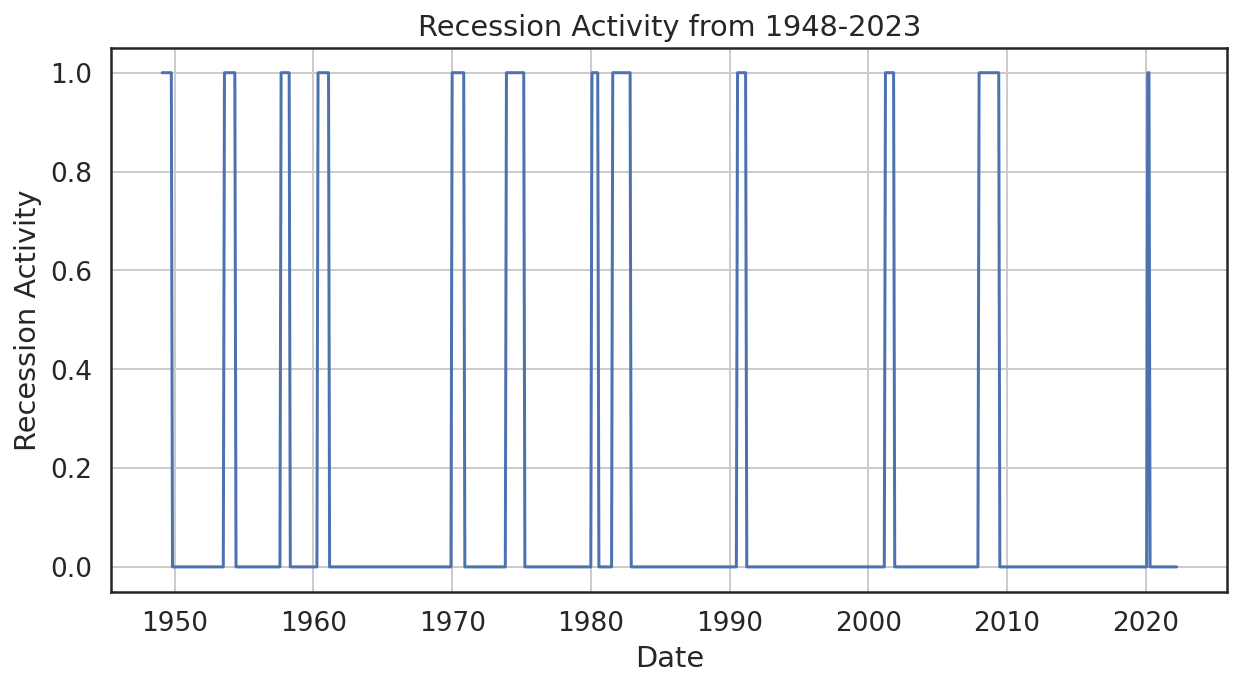

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(merged_df.index, merged_df["recession_value"])
plt.xlabel("Date")
plt.ylabel("Recession Activity")
plt.title("Recession Activity from 1948-2023")
plt.grid(True)
plt.show()

In [20]:
unemployment = unemployment.iloc[1:]
unemployment.head()

,date,unemployment_rate,unemployment_rate_change
1,1948-02-01,3.8,0.117647
2,1948-03-01,4.0,0.052632
3,1948-04-01,3.9,-0.025000
4,1948-05-01,3.5,-0.102564
5,1948-06-01,3.6,0.028571


In [21]:
unemployment.describe()

,unemployment_rate,unemployment_rate_change
count,903.000000,903.000000
mean,5.725471,0.002072
std,1.705292,0.087887
min,2.500000,-0.189873
25%,4.400000,-0.022727
50%,5.500000,0.000000
75%,6.800000,0.020000
max,14.700000,2.340909


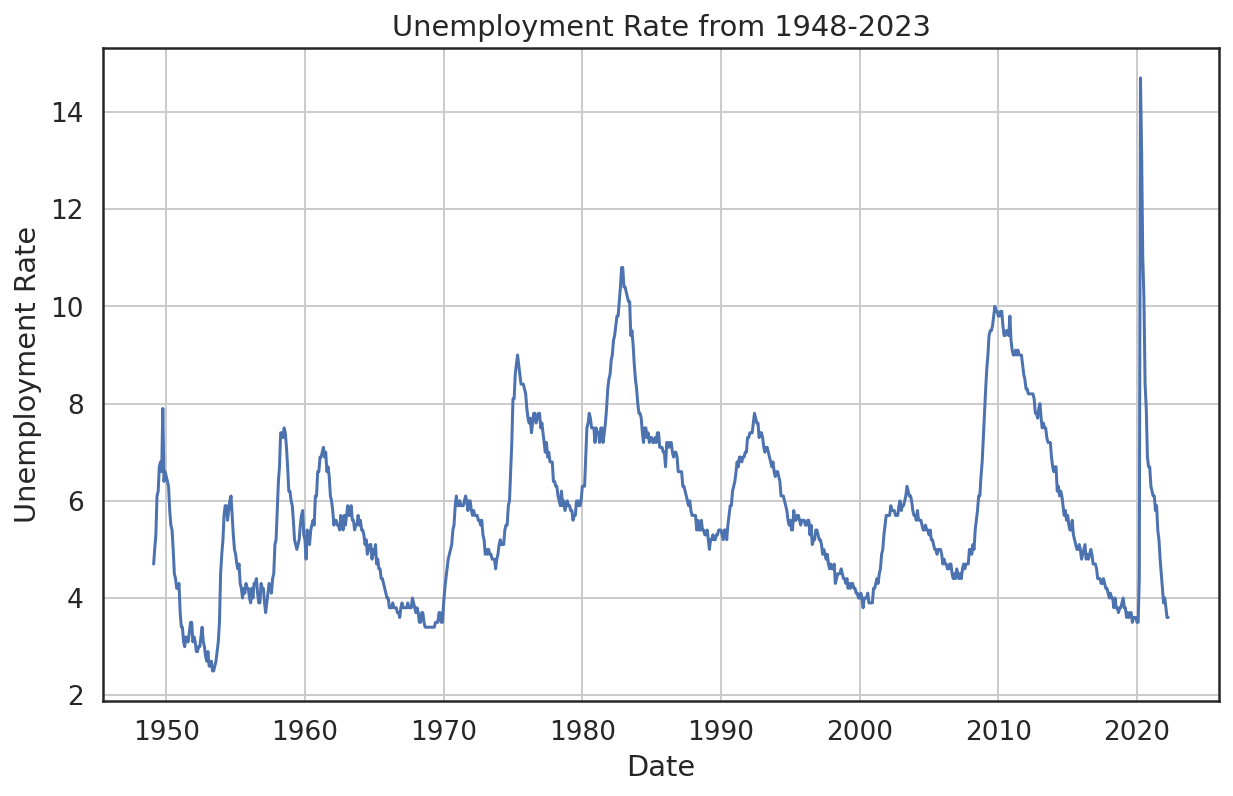

In [22]:
plt.figure(figsize = (10, 6))
plt.plot(merged_df.index, merged_df["unemployment_rate"])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate from 1948-2023")
plt.grid(True)
plt.show()

>The recession data has value of either 1 where it indicates a recessionary period, and a value of 0 indicating an expansionary period. We can see that there are around 12 periods of recession that vary in their lengths. From the graphs, it can be observed that  when there is a value of 1 in the recession activity, there is also a major spike in unemployment rate.

In [23]:
merged_df.head()

,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
date,,,,,,,,,,,,,,,,,,,,,
1949-02-01,4.7,0.093023,1,-0.015385,-0.015152,0.031250,-0.189873,0.196970,-0.029412,0.014925,...,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564,-0.025000,0.052632,0.117647
1949-03-01,5.0,0.063830,1,-0.015625,-0.015385,-0.015152,0.031250,-0.189873,0.196970,-0.029412,...,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564,-0.025000,0.052632
1949-04-01,5.3,0.060000,1,-0.079365,-0.015625,-0.015385,-0.015152,0.031250,-0.189873,0.196970,...,0.075000,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564,-0.025000
1949-05-01,6.1,0.150943,1,-0.051724,-0.079365,-0.015625,-0.015385,-0.015152,0.031250,-0.189873,...,0.093023,0.075000,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571,-0.102564
1949-06-01,6.2,0.016393,1,-0.018182,-0.051724,-0.079365,-0.015625,-0.015385,-0.015152,0.031250,...,0.063830,0.093023,0.075000,0.052632,0.027027,-0.026316,-0.025641,0.083333,0.000000,0.028571


In [24]:
merged_df.describe()

,unemployment_rate,unemployment_rate_change,recession_value,lagged_unemployment_rate_change-12,lagged_unemployment_rate_change-11,lagged_unemployment_rate_change-10,lagged_unemployment_rate_change-9,lagged_unemployment_rate_change-8,lagged_unemployment_rate_change-7,lagged_unemployment_rate_change-6,...,lagged_unemployment_rate_change3,lagged_unemployment_rate_change4,lagged_unemployment_rate_change5,lagged_unemployment_rate_change6,lagged_unemployment_rate_change7,lagged_unemployment_rate_change8,lagged_unemployment_rate_change9,lagged_unemployment_rate_change10,lagged_unemployment_rate_change11,lagged_unemployment_rate_change12
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,5.781115,0.001891,0.138794,0.001297,0.001312,0.001379,0.001096,0.001353,0.001351,0.001399,...,0.002183,0.002124,0.002176,0.002347,0.002418,0.002538,0.002464,0.002532,0.002572,0.002762
std,1.694002,0.088677,0.345928,0.088009,0.088005,0.088005,0.088219,0.088461,0.088461,0.088457,...,0.088696,0.088697,0.088667,0.088679,0.088652,0.088616,0.088677,0.088633,0.088647,0.088715
min,2.500000,-0.189873,0.000000,-0.176471,-0.176471,-0.176471,-0.189873,-0.189873,-0.189873,-0.189873,...,-0.189873,-0.189873,-0.189873,-0.189873,-0.189873,-0.189873,-0.189873,-0.189873,-0.189873,-0.189873
25%,4.600000,-0.022222,0.000000,-0.022727,-0.022727,-0.022727,-0.022727,-0.022727,-0.022727,-0.022475,...,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222
50%,5.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.800000,0.019608,0.000000,0.019049,0.019049,0.019231,0.019049,0.019231,0.019231,0.019231,...,0.019804,0.019608,0.019608,0.019804,0.019804,0.020000,0.020000,0.020000,0.020000,0.020000
max,14.700000,2.340909,1.000000,2.340909,2.340909,2.340909,2.340909,2.340909,2.340909,2.340909,...,2.340909,2.340909,2.340909,2.340909,2.340909,2.340909,2.340909,2.340909,2.340909,2.340909


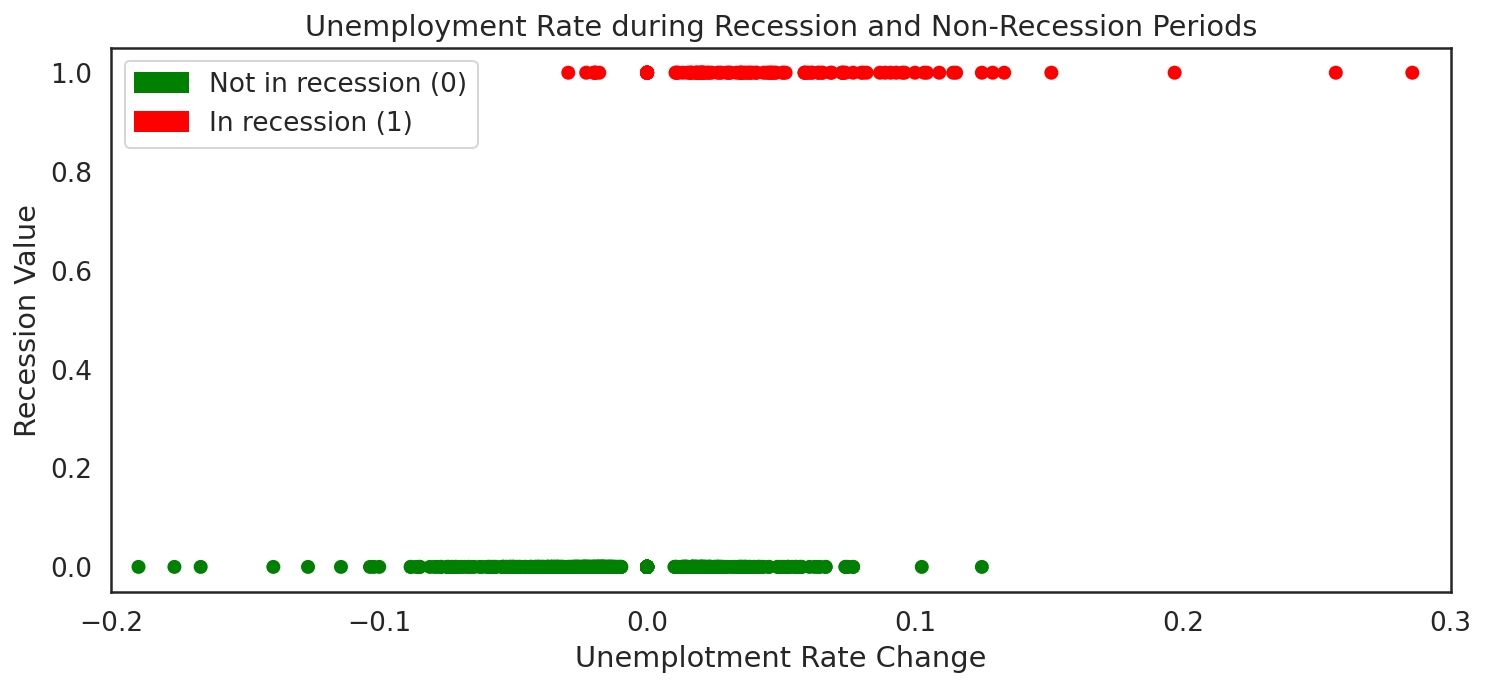

In [25]:
X = merged_df["unemployment_rate_change"]
y = merged_df.loc[X.index, "recession_value"].dropna()

colors = ["green" if val == 0 else "red" for val in y]
legend_elements = [
    mpatches.Patch(color='green', label='Not in recession (0)'),
    mpatches.Patch(color='red', label='In recession (1)')
]
plt.legend(handles=legend_elements)


plt.scatter(X, y, color = colors)
plt.xlabel("Unemplotment Rate Change")
plt.ylabel("Recession Value")
plt.title("Unemployment Rate during Recession and Non-Recession Periods")
plt.xlim(-0.2, 0.3)
plt.show()

>The scatter plot above has two sections to it, one in recession and one not in recession. The two sections essentially function as a number line with the ranges of unemployment rate change spread throughout. This graph visualizes the fact that, when in recession, unemployment rate changes are generally higher and contain a lower minimum/higher maximum.

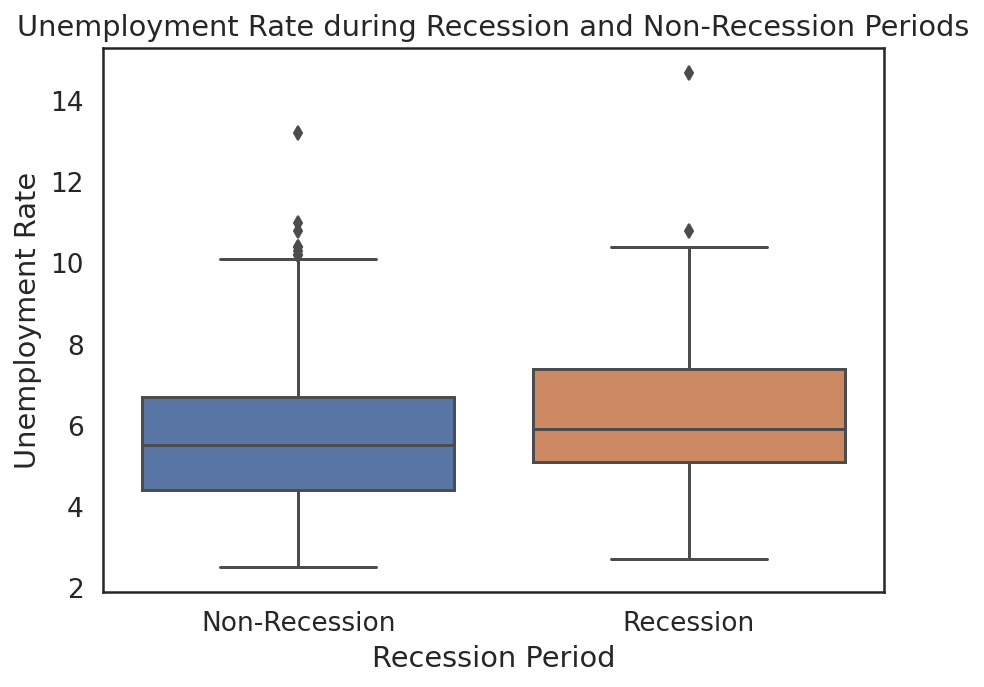

In [26]:
plt.figure(figsize=(7, 5))

sns.boxplot(x = merged_df["recession_value"], y = merged_df["unemployment_rate"])

plt.title('Unemployment Rate during Recession and Non-Recession Periods')
plt.xticks([0, 1], ['Non-Recession', 'Recession'])
plt.xlabel('Recession Period')
plt.ylabel('Unemployment Rate')
plt.show()

>Compared to non-recession periods, the unemployment rates during periods of recession have:
    - lower minimum
    - higher Q1, median, and Q3
    - higher maximum

>Although the graph may make the differences look slight, or small, but the workforce of the United States is made up of 158 million invididuals. A different of 0.001% could effect 158,000 people.

>This graph again works to visualize the fact that, when in recession, unemployment rate changes are generally higher and contain a lower minimum/higher maximum.

Text(0.5, 1.0, 'General Unemployment Rate Change and Recession Periods')

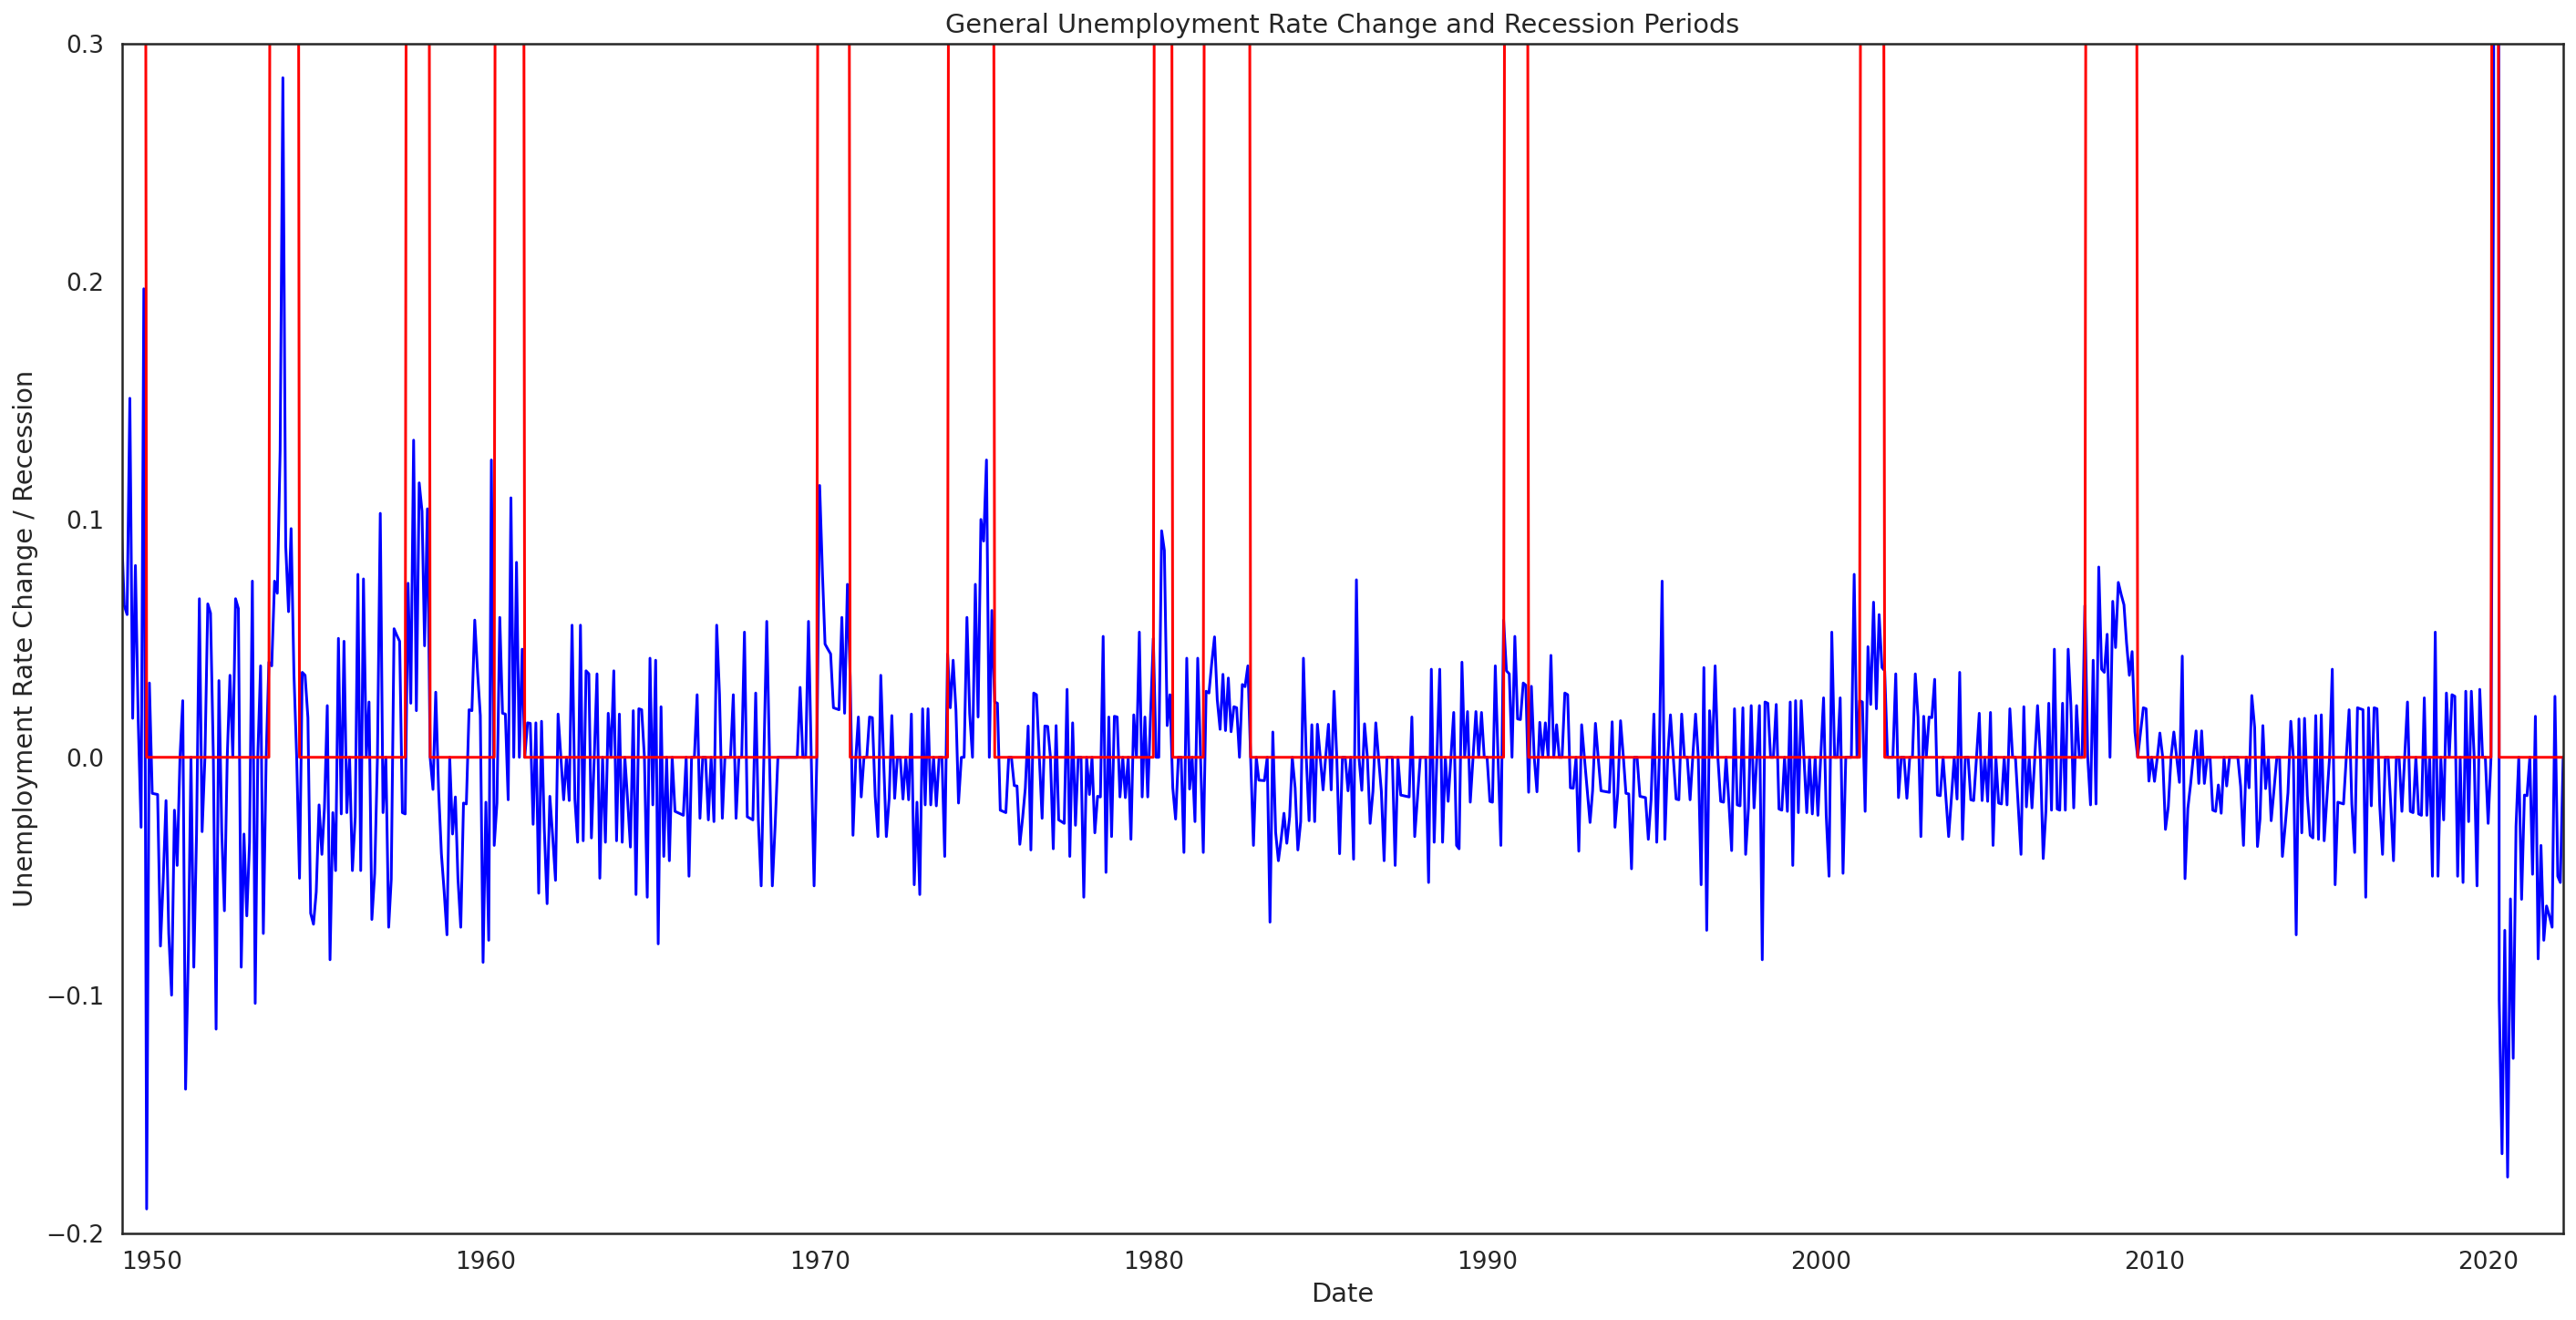

In [27]:
fig, ax = plt.subplots(figsize=(24, 12))

ax.plot(merged_df.index, merged_df["unemployment_rate_change"], color = "blue", label='Unemployment Rate Change')
ax.plot(merged_df.index, merged_df['recession_value'], color='red', label='Recession')

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate Change / Recession')
ax.set_ylim([-0.2, 0.30])
ax.set_xlim(merged_df.index[0], merged_df.index[-1])
ax.set_title('General Unemployment Rate Change and Recession Periods')

As recessions occur, there is a subsequent increase in unemployment. There are few moments where there is a noticeable uptick in unemployment before the recessions occur. However, during non-recession periods we still do see very common, smaller, jumps and falls that would make those pre-recession increases not out of the blue. 

The spikes of increase in unemployment represent periods where the recession was causing great deals of job insecurity due to recessions. As expected, after periods of recession end, the largest decrease in unemployment rates occurs, showing some local minima. In between the end of the recession and the beginning of the next, the graph seems to stabilzize.

**CONSTRUCTION**

Text(0.5, 1.0, 'Unemployment Rate (Construction) Change and Recession Periods')

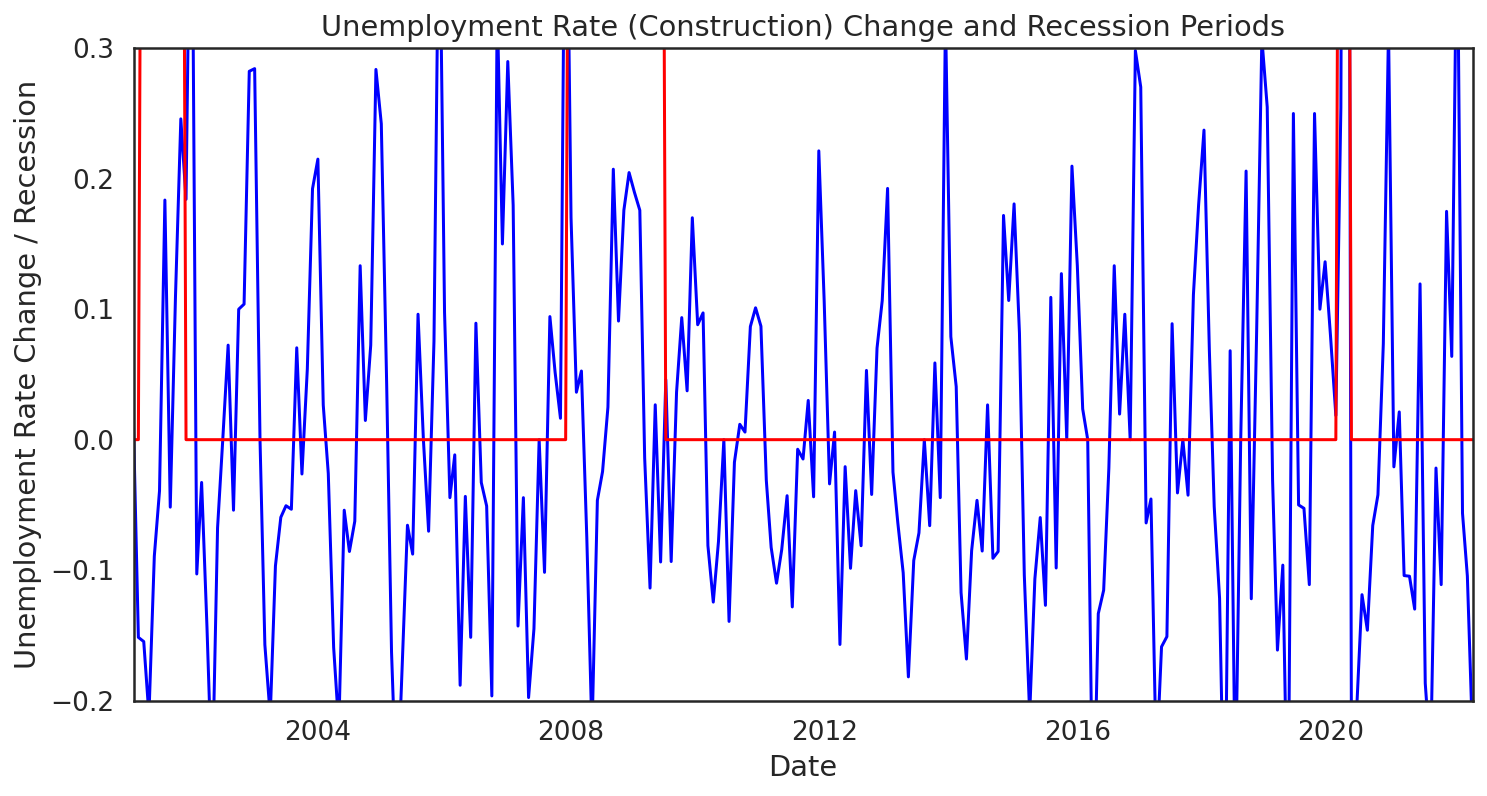

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(construction.index, construction["unemployment_rate_change"], color = "blue", label='Unemployment Rate Change')
ax.plot(merged_df.index, merged_df['recession_value'], color='red', label='Recession')

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate Change / Recession')
ax.set_ylim([-0.2, 0.30])
ax.set_xlim(construction.index[0], construction.index[-1])
ax.set_title('Unemployment Rate (Construction) Change and Recession Periods')

**MANUFACTURING**

Text(0.5, 1.0, 'Unemployment Rate (Manufactoring) Change and Recession Periods')

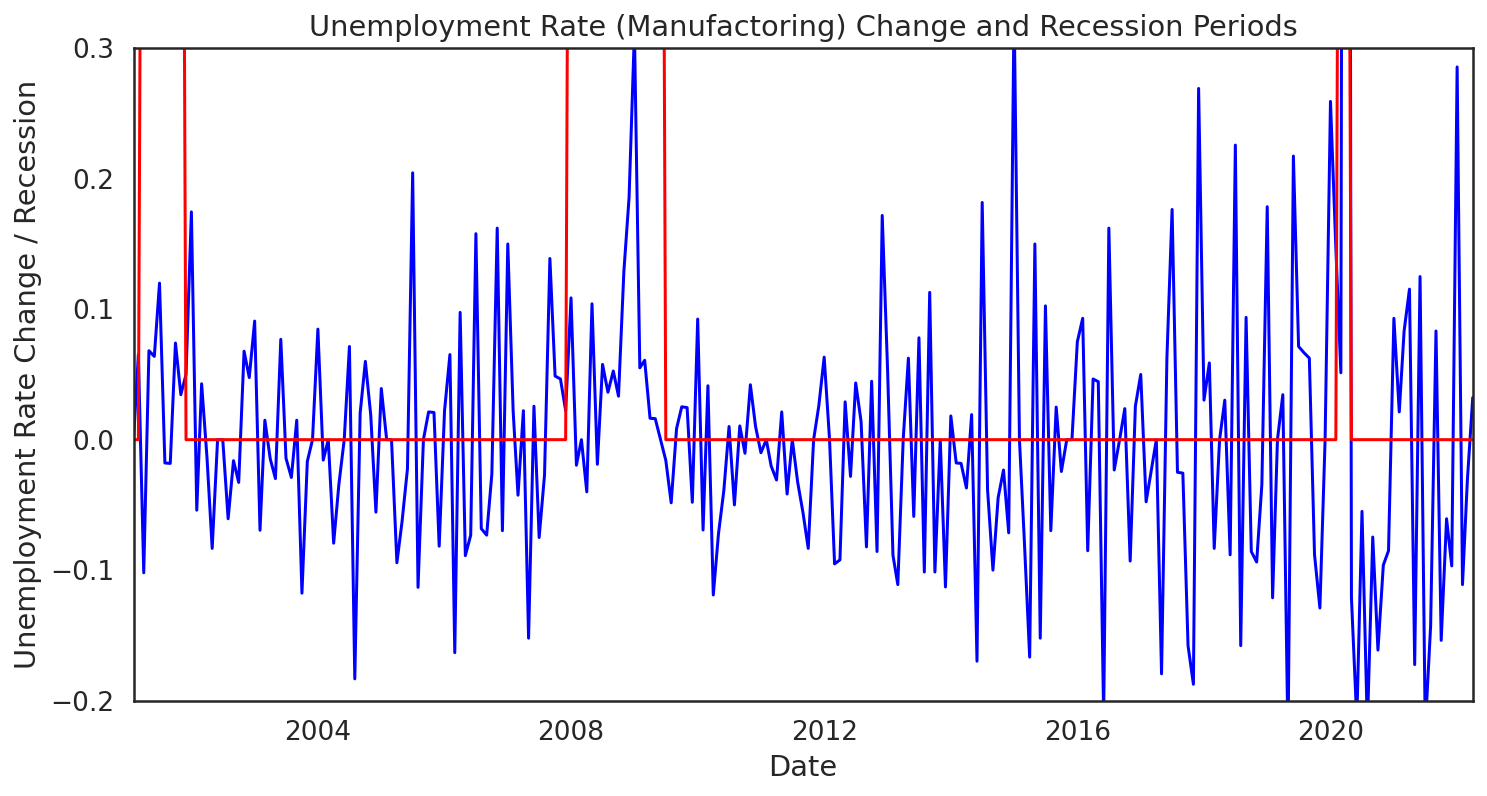

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(manufacturing.index, manufacturing["unemployment_rate_change"], color = "blue", label='Unemployment Rate Change')
ax.plot(merged_df.index, merged_df['recession_value'], color='red', label='Recession')

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate Change / Recession')
ax.set_ylim([-0.2, 0.30])
ax.set_xlim(manufacturing.index[0], construction.index[-1])
ax.set_title('Unemployment Rate (Manufactoring) Change and Recession Periods')

**INDIVIDUALS HOLDING DEGREES (BACHELORS AND HIGHER)**

Text(0.5, 1.0, 'Unemployment Rate (People with Bachelors Degrees and Higher) Change and Recession Periods')

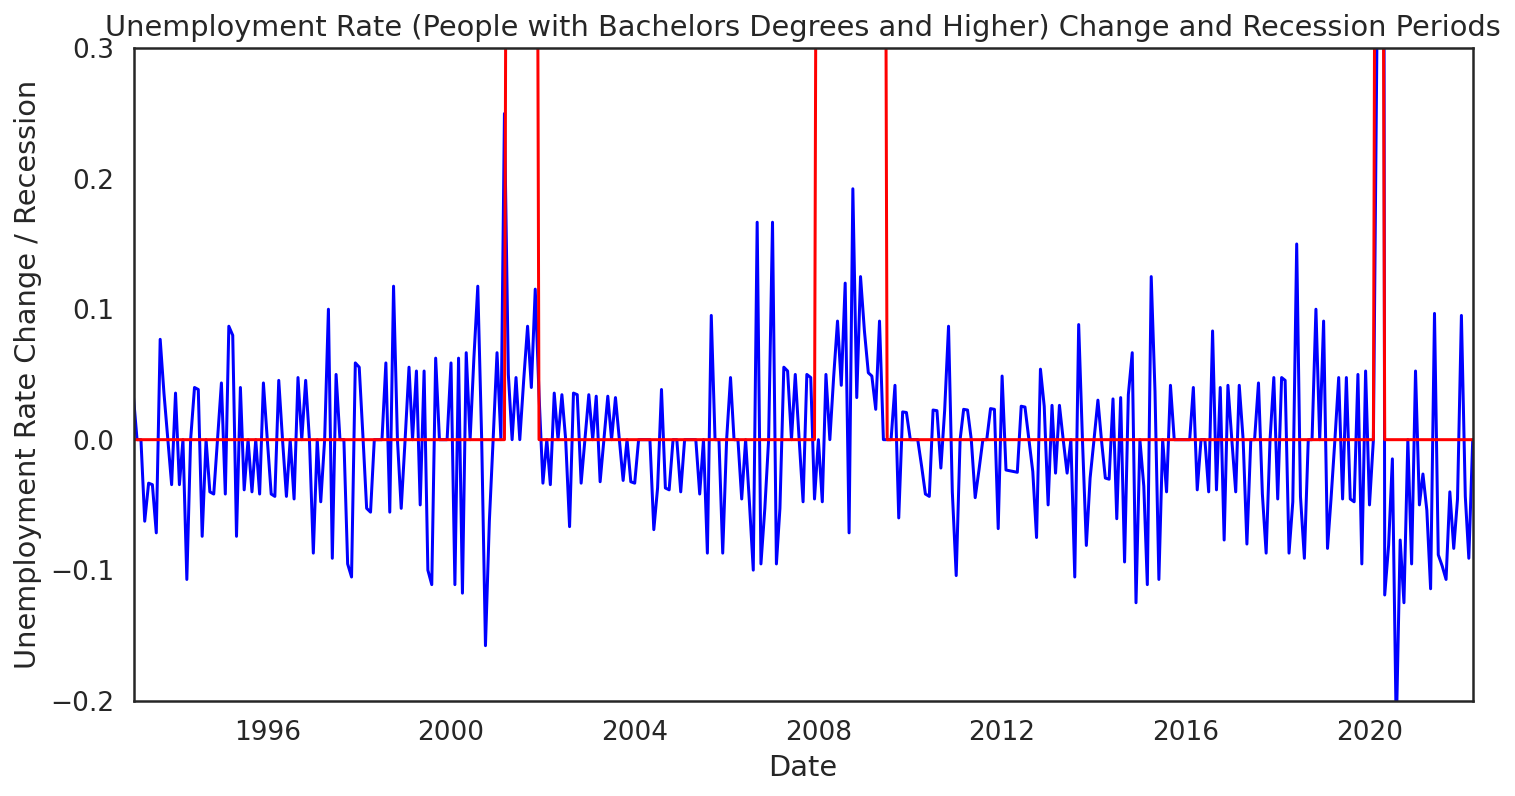

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(degrees.index, degrees["unemployment_rate_change"], color = "blue", label='Unemployment Rate Change')
ax.plot(merged_df.index, merged_df['recession_value'], color='red', label='Recession')

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate Change / Recession')
ax.set_ylim([-0.2, 0.30])
ax.set_xlim(degrees.index[0], degrees.index[-1])
ax.set_title('Unemployment Rate (People with Bachelors Degrees and Higher) Change and Recession Periods')

In [31]:
correlation_coefficient, p_value = stats.pearsonr(merged_df["unemployment_rate_change"], merged_df["recession_value"])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.2864648750539013
P-value: 4.5868152555232705e-18


>Our correlation coefficient above indicated a positive, moderate, correlation between the unemployment rate and the occurence of recessions which means higher unemployment rates are more likely to be associated with periods of economic recession.

>We can be fairly certain that this is not due to chance with our p-value being approcimately 0.0000000000000000045868.

>Now that we know a relationship does exist, we will conduct further analysis to asses whether changes in unemployment rate lead or lag behind the occurence of economic recessions.

 **Time Lag Analysis of Pearson Correlation Coefficients**

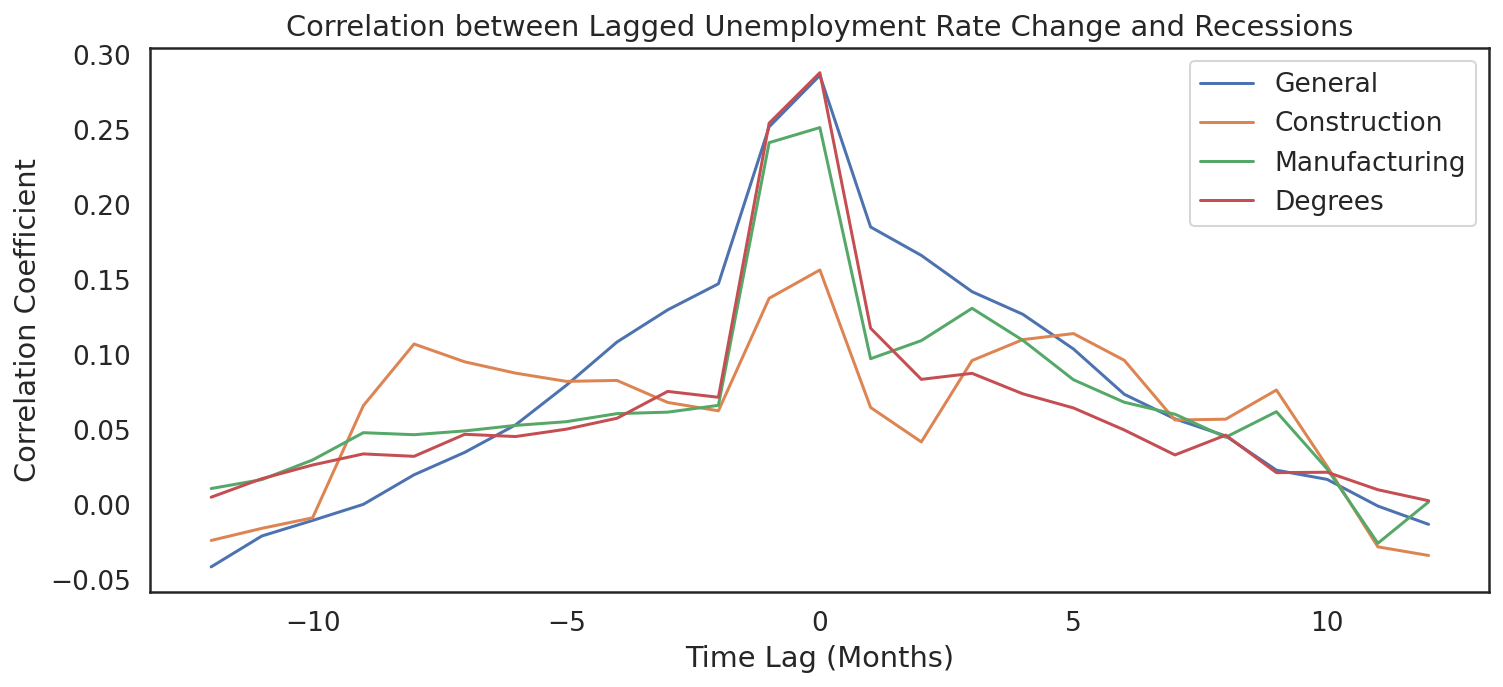

General Lagged Correlations [[-0.041473019247274215, 0.21930879722364877], [-0.020842936563842507, 0.5371438991469243], [-0.010496986963307623, 0.7559681165186158], [0.00024379076643155575, 0.9942412324936301], [0.019966464280229055, 0.5543991623607158], [0.034953331715251404, 0.3006055249396825], [0.05325517557391714, 0.11461641828480135], [0.0796361050811243, 0.018204238278697927], [0.10853506697384166, 0.0012695025294372155], [0.12999757305929202, 0.00011104952816778417], [0.147400805261298, 1.1445051125332232e-05], [0.25212652642417005, 3.266471002839768e-14], [0.2864648750539013, 4.5868152555232705e-18], [0.18528652466200227, 3.1385339287384315e-08], [0.1663351835995837, 7.083421813292995e-07], [0.14213509236578667, 2.342048944396552e-05], [0.12705697603001007, 0.00015877109570317365], [0.10388468742799052, 0.0020428484596001066], [0.07370823730936613, 0.028877100663752635], [0.05726792999472592, 0.08972455796734737], [0.045877055614545255, 0.1741656139001611], [0.0230637017843368

In [32]:
#Time Lag Analysis of Pearson Correlation Coefficients
lags = range(-12,13)

#General
gen_lagged_correlations = []
gen_lagged_pvalues = []

for lag in lags:
    correlation, p_value = stats.pearsonr(merged_df["lagged_unemployment_rate_change{}".format(lag)], merged_df["recession_value"])
    gen_lagged_correlations.append(correlation)
    gen_lagged_pvalues.append(p_value)
    
gen_both = []
for i in range(len(gen_lagged_correlations)):
    gen_both.append([gen_lagged_correlations[i], gen_lagged_pvalues[i]])

#Construction
construction_lagged_correlations = []
construction_lagged_pvalues = []

for lag in lags:
    correlation, p_value = stats.pearsonr(construction["lagged_unemployment_rate_change{}".format(lag)], construction["recession_value"])
    construction_lagged_correlations.append(correlation)
    construction_lagged_pvalues.append(p_value)
    
construction_both = []
for i in range(len(construction_lagged_correlations)):
    construction_both.append([construction_lagged_correlations[i], construction_lagged_pvalues[i]])

#Manufacturing
manufacturing_lagged_correlations = []
manufacturing_lagged_pvalues = []

for lag in lags:
    correlation, p_value = stats.pearsonr(manufacturing["lagged_unemployment_rate_change{}".format(lag)], manufacturing["recession_value"])
    manufacturing_lagged_correlations.append(correlation)
    manufacturing_lagged_pvalues.append(p_value)
    
manufacturing_both = []
for i in range(len(manufacturing_lagged_correlations)):
    manufacturing_both.append([manufacturing_lagged_correlations[i], manufacturing_lagged_pvalues[i]])

#Degrees
degrees_lagged_correlations = []
degrees_lagged_pvalues = []

for lag in lags:
    correlation, p_value = stats.pearsonr(degrees["lagged_unemployment_rate_change{}".format(lag)], degrees["recession_value"])
    degrees_lagged_correlations.append(correlation)
    degrees_lagged_pvalues.append(p_value)

degrees_both = []
for i in range(len(degrees_lagged_correlations)):
    degrees_both.append([degrees_lagged_correlations[i], degrees_lagged_pvalues[i]])
        
plt.plot(lags, gen_lagged_correlations, label='General')
plt.plot(lags, construction_lagged_correlations, label='Construction')    
plt.plot(lags, manufacturing_lagged_correlations, label='Manufacturing')
plt.plot(lags, degrees_lagged_correlations, label='Degrees')

plt.xlabel('Time Lag (Months)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Lagged Unemployment Rate Change and Recessions')
plt.legend()
plt.show()

#the printed correlations is a 2-d list with the inner list formation being [coefficient, p-value]
print("General Lagged Correlations", gen_both)
print("\nConstruction Lagged Correlations", construction_lagged_correlations)
print("\nManufacturing Lagged Correlations", manufacturing_lagged_correlations)
print("\nDegrees Lagged Correlations", degrees_lagged_correlations)

>The correlations between the lagged changes in unemployment rate of the general sector and occurence of recessions range from -0.041 to 0.286, indicating a weak to moderate positive relationship. As the lag values get closer to 0, the correlations grow stronger and their respective p-values grows smaller which may indicate. For the general sector, the range of correlations with significant p-values is from -5 through 6 months of lag. This indicates that changes in the general unemployment rate both follows and leads recessions with a short time delay, with a greater length of following.

>Within the construction sector, the only statistically significant correlation comes with a positive correlation at a lag of 0 which suggests the changes in unemployment rate and recessions occur simultaneously.

>The manufacturing has statistically significant, correlations only at -1 (moderate), 0 (moderate), and 3 (weak) months of lag with all being positive. For the degrees sector, the significant correlations come at -1 (moderate), 0 (moderate), and 1 with all being positive as well. 

>Overall, the correlations between changes in the unemployment rate and the occurence of recessions generally become strong the closer the time lag is to 0, with the largest correlation being at 0. 

>The parabola-shaped spikes in the graph created by the gradually increase in unemployment rate change before and decrease of the rate change after the 0 months of lag point is likely due to the nature of the occurence of recessions. Recessions do not occur immediately but through processes that unfold over time.

In [33]:
#Create testing and train dataframes
train_size = int(len(merged_df) * 0.8)
train_data = merged_df.iloc[:train_size]
test_data = merged_df.iloc[train_size:]

In [34]:
#ADF test to check stationarity
unrate_changes = merged_df["unemployment_rate"]
result = sm.tsa.adfuller(unrate_changes)
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Stationary: {result[4]["5%"] > adf_statistic}')

#Vector Autoregression
model = sm.tsa.VAR(merged_df[["unemployment_rate", "recession_value"]])
lag_order = model.select_order()

results = model.fit(lag_order.aic)
print(results.summary())

ADF Statistic: -3.808490156085442
p-value: 0.0028216343450003603
Stationary: True


/home/mmmansour/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 24, Jun, 2023
Time:                     22:39:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.54556
Nobs:                     877.000    HQIC:                  -5.57919
Log likelihood:          -23.2089    FPE:                 0.00369779
AIC:                     -5.60002    Det(Omega_mle):      0.00365598
--------------------------------------------------------------------
Results for equation unemployment_rate
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.141245         0.048560            2.909           0.004
L1.unemployment_rate         0.921602         0.033797           27.269           0.000
L1.recession_value  

In [35]:
granger_causality = results.test_causality("unemployment_rate", "recession_value", kind = "f")
print(granger_causality.summary())

granger_causality = results.test_causality("recession_value", "unemployment_rate", kind = "f")
print(granger_causality.summary())

Granger causality F-test. H_0: recession_value does not Granger-cause unemployment_rate. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         54.03          3.001   0.000 (2, 1744)
-----------------------------------------------
Granger causality F-test. H_0: unemployment_rate does not Granger-cause recession_value. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         18.94          3.001   0.000 (2, 1744)
-----------------------------------------------


>The Granger causality tests examines whether changes in the unemployment rate Granger-cause recessions. The F-test statistics of 54.03 and 18.94 with the p-value of 0 indicates strong evidence that unemployment rate and recessions Granger-cause each other in an interdepenence, implying that changes in unemployment rate lead to significant changes in the occurence of recessions and vice versa.

In [36]:
irf = results.irf(25)

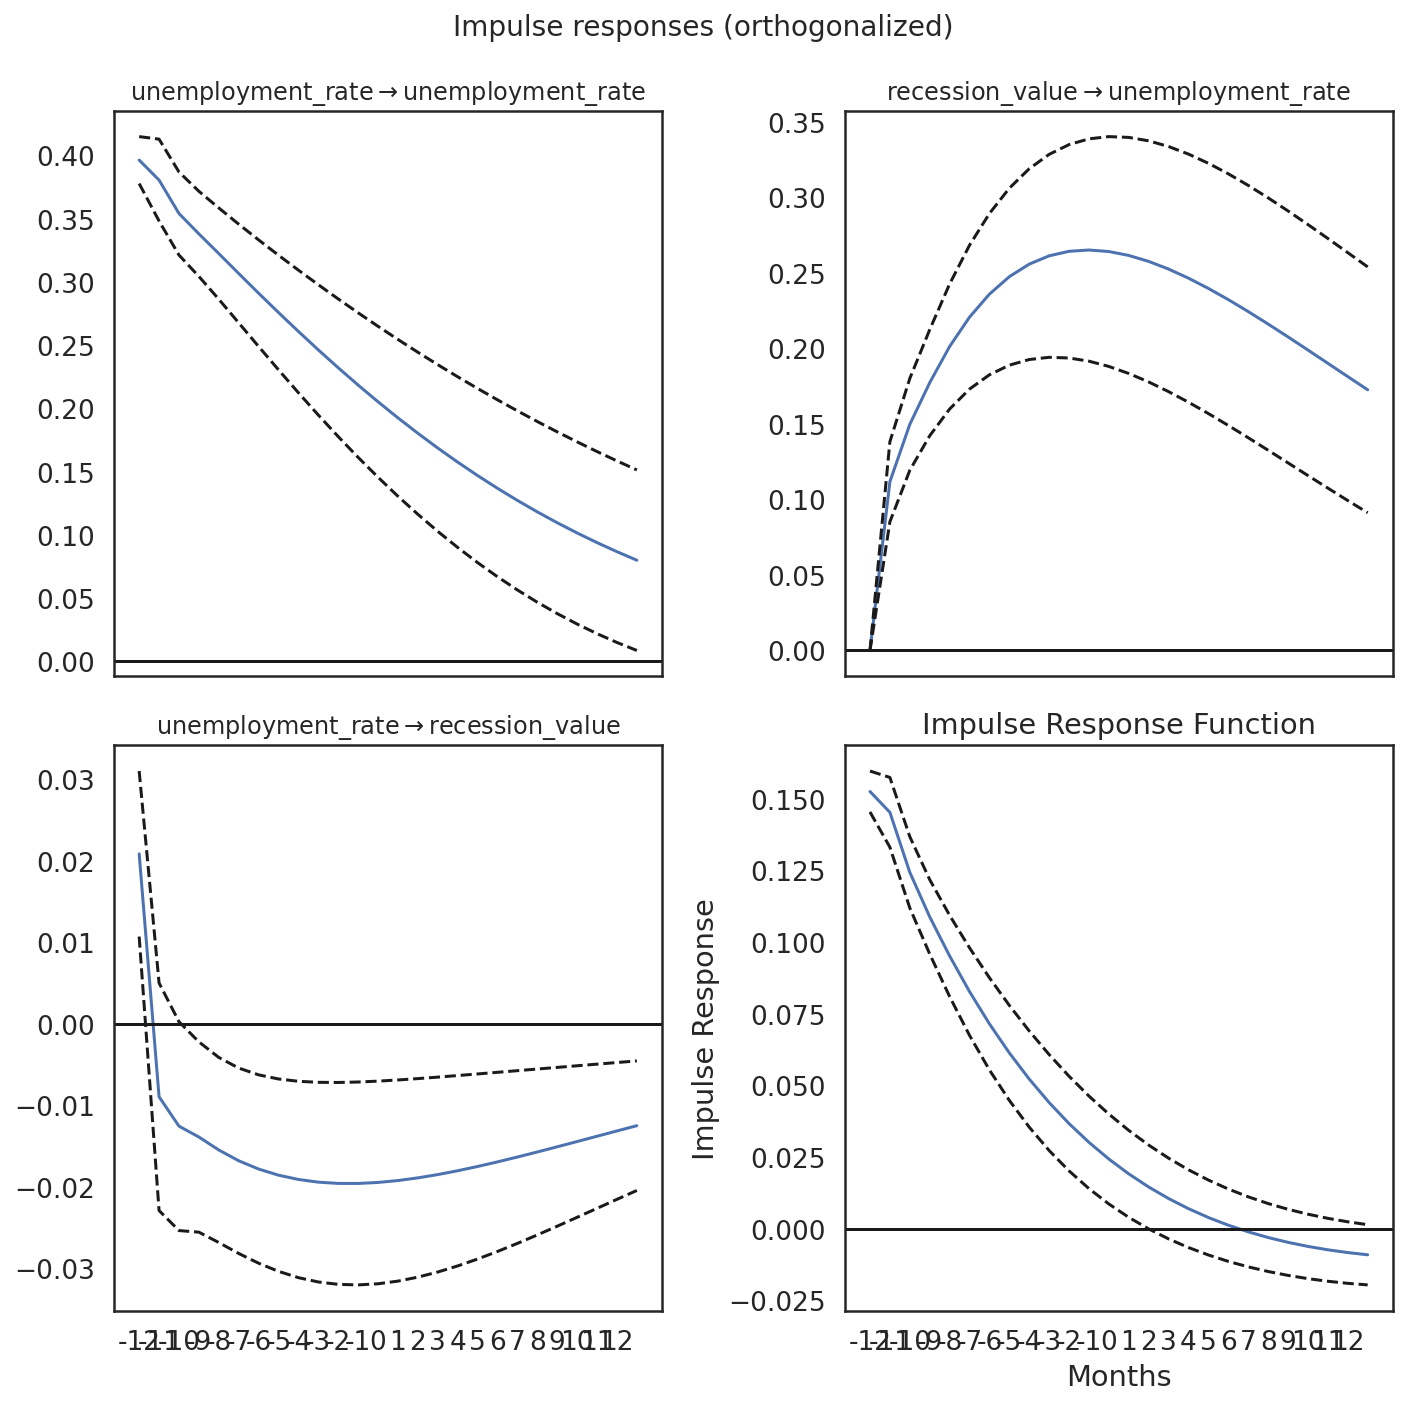

Impulse Response Function: unemployment_rate --> unemployment_rate
----------------------------------------------
[1.         0.92160228 0.84181938 0.79174955 0.74415512 0.6977337
 0.65320702 0.61064648 0.5700416  0.53138329 0.49465278 0.45982101
 0.42685047 0.39569673 0.36630968 0.33863464 0.31261337 0.28818495
 0.26528653 0.24385406 0.22382282 0.20512798 0.18770504 0.17149016
 0.15642055 0.14243468]
----------------------------------------------

Impulse Response Function: unemployment_rate --> recession_value
----------------------------------------------
[0.         0.73195221 0.98062894 1.16139083 1.31847191 1.44582124
 1.54566131 1.62138074 1.67589081 1.71179746 1.73146733 1.73704334
 1.73046082 1.71346399 1.68762123 1.65433944 1.61487741 1.57035831
 1.52178128 1.47003227 1.41589403 1.36005547 1.30312025 1.24561475
 1.18799544 1.13065568]
----------------------------------------------

Impulse Response Function: recession_value --> unemployment_rate
------------------------------

In [37]:
irf.plot(orth=True, plot_stderr=True)

plt.xlabel('Months')
plt.ylabel('Impulse Response')
plt.title('Impulse Response Function')

time_range = range(-12, 13)
plt.xticks(range(len(time_range)), time_range)

plt.tight_layout()  
plt.show()

var_names = results.names

# Print a summary of the impulse response analysis
for i in range(len(var_names)):
    for j in range(len(var_names)):
        print(f"Impulse Response Function: {var_names[i]} --> {var_names[j]}")
        print("----------------------------------------------")
        print(irf.irfs[:, i, j])
        print("----------------------------------------------\n")

The impulse response analysis provides insights into the effect of changes in one variable on another variable over time.

- recession_value -> unemployment_rate
    > The values range from -0.0074 to 0, indicating that a shock in the occurence of recessions has a negative effect on the unemployment rate. A negative effect suggests that recessions can lead to a decrease in unemployment rate. The response is initially negative and gradually increases, indicating that recessions have a lagged negative impact on unemployment rates.
    
- unemployment_rate -> recession_value
    > The values range from 0, 1.731, indicating that a shock in the unemployment rate leads to a positive effect on the occurence of recessions. A positive effect suggests that changes in the unemployment rate can lead to an increased likelihood of recessions. The response of the unemployment rate increases initially and then stabilizes at higher levels, indicating that changes in unemployment rate have a lagged effect on recessions, suggesting they lead the occurence of recessions.
    
- recession_value -> recession_value
    > The values range from 0.240 to 1, indicating a shock in the occurence of recessions leads to a positive effect on subsequent recessions which is a self-reinforcing effect leading to a higher likelihood of subsequent recessions.
    
- unemployment_rate -> unemployment_rate
    > The values range from 0.494 to 1, indicating a shock in the unemployment rate leads tp positive effect on itself, displaying a long-term positive effect.
    
>To summarize, the results indicate that changes in the unemployment rate lead to changes in the occurence of recessions. This suggests that flucuations in unemployment rate may precede the onset of recessions

In [38]:
#Prediction for one year
prediction = results.forecast(merged_df[["unemployment_rate", "recession_value"]].values, steps = 12)
print("Predictions via Vector Autoregression Model:")
print(prediction)

Predictions via Vector Autoregression Model:
[[3.6233246  0.03482809]
 [3.67031311 0.0663041 ]
 [3.72410164 0.09295726]
 [3.78301791 0.11611103]
 [3.84629489 0.13616519]
 [3.91292444 0.15340193]
 [3.98199266 0.16810052]
 [4.05270534 0.18052025]
 [4.12436941 0.19089866]
 [4.19638235 0.19945337]
 [4.26822363 0.20638348]
 [4.33944667 0.21187089]]


>The predictions above output a predicted recession value that is not categorical as the orginal data used is. Rather, the continuous value represents the probability of a recession occuring and we see an increasing chance. However, in order to attempt a better prediction and regression, we will create a Logistic Regression model to further support out claims.

In [39]:
#Logistic Regression
X_train = sm.add_constant(train_data['unemployment_rate_change'])

# Create the logistic regression model
logit_model = sm.Logit(train_data['recession_value'], X_train)

# Fit the model to the training data
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())

#Prediction
X_test = sm.add_constant(test_data['unemployment_rate_change'])
y_pred = logit_result.predict(X_test)
y_pred_categorical = (y_pred > 0.5).astype(int)

predictions_df = pd.DataFrame({'date': test_data.index, 'recession_prediction': y_pred_categorical})
predictions_df.set_index('date', inplace=True)

Optimization terminated successfully.
         Current function value: 0.300634
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        recession_value   No. Observations:                  703
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.2740
Time:                        22:39:47   Log-Likelihood:                -211.35
converged:                       True   LL-Null:                       -291.11
Covariance Type:            nonrobust   LLR p-value:                 1.430e-36
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4275      0.161    -15.075      0.000      -2.743

In [40]:
predictions_df

,recession_prediction
date,
2007-09-01,0
2007-10-01,0
2007-11-01,0
2007-12-01,1
2008-01-01,0
...,...
2021-12-01,0
2022-01-01,0
2022-02-01,0


In [41]:
print("Start Date:", predictions_df.index[0])
print("End Date:", predictions_df.index[-1])
predictions_df.value_counts()

Start Date: 2007-09-01 00:00:00
End Date: 2022-04-01 00:00:00


recession_prediction
0                       168
1                         8
dtype: int64

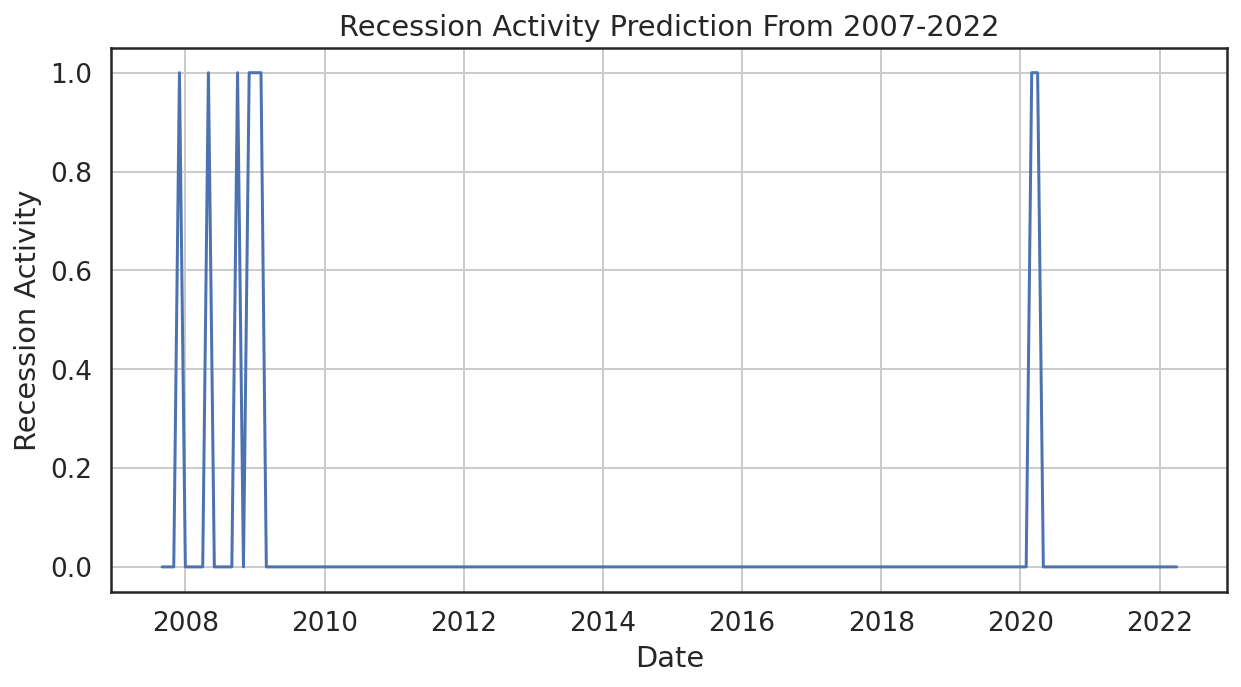

In [42]:
plt.figure(figsize = (10, 5))
plt.plot(predictions_df.index, predictions_df["recession_prediction"])
plt.xlabel("Date")
plt.ylabel("Recession Activity")
plt.title("Recession Activity Prediction From 2007-2022")
plt.grid(True)
plt.show()

# Ethics & Privacy

>With all data science reserach, addressing ethical and privacy implications is essential to the process, even if the research question may not seem to be problematic or unethical. Our datasets came from the Federal Reserve of Economic Data, known as *FRED*. This online database cotnains economic data from national, international, public, and private sources. The Research Department at the Federal Reserve Bank of St. Louis that maintain the database do a great job of not including any information that would breach individuals' privacy rights such as names, addresses, or social security numbers, for example. Since the data came from public resources rather than our own collection, we need not worry about protecting the data from unauthorized access as anyone with internet access can find the data used very easily. 

>One concern was crossed with informed consent as we did not obtain consent from the individuals themselves, however, this is public data that is free of personally identifiable information that was gathered through a federal organization. Responsible data handling was ensured as all data cleaning and handling has been included within this paper as well as interpretations of all analyses. Due to the nature of economic data analysis being used for policy making, responsible data handling is essential in order for everything to be transparent and concise, albeit while being robust. 

>Lastly, the team strived to collect data that we saw as being unbias, however, we cannot be completely certain that every single unemployed individual can be accounted for due to factors such as individuals without documentation which is a refelction of societal biases in employment. Hence, the team made sure to avoid any potential biases and tried our best to take care of the ethical and privacy issues that usually come up while dealing with large dataset analysis.



# Conclusion & Discussion

>This research aimed to investigate the temportal relationship between changes in the unemployment rate and the occurrence of economic recessions, while also exploring how this relationship varies across different three specific sectors: construction, manufacturing, and degrees. The findings were obtained through utilizing a general Pearson's correlation coefficient calculation, time lag analysis with Pearson's correlation coefficient, a Vector Autoregression model, Augmented Dickey-Fuller test, Granger causality test, impulse response function analysis, and forecasting. Understanding the relationship between changes in the unemployment rate and economic recessions has significant implications for policymakers in formulating strategies to mitigate the negative impacts caused by recessions. This study contributes to this understanding.

>Firstly, the general correlation coefficient revealed a significant moderate positive correlation between changes in the unemployment rate and the occurrence of recessions. This finding confirms the presence of a relationship and supports further investigation.

>The time lag analysis examined the correlation between recession values and lagged unemployment rate changes across lags ranging from -12 to 12 months. The results showed weak negative to positive correlations, indicating a complex relationship between the two variables. The construction and manufacturing sectors exhibited similar patterns, while the degrees sector did not display any significant negative correlations, although the negative correlations present in other sectors were weak.

>The Augmented Dickey-Fuller test confirmed the stationarity of changes in the unemployment rate series. This implies that fluctuations in the unemployment rate exhibit stable and predictable behavior, indicating long-term patterns rather than random fluctuations, supporting the suitability of further analysis.

>The Granger causality tests provided significant evidence of a causal relationship between the occurrence of recessions and changes in the unemployment rate. The first test examined whether the occurrence of recessions Granger-causes changes in the rate of unemployment, indicating a predictive effect on future changes in unemployment. The second test investigated whether changes in the unemployment rate Granger-cause the occurrence of recessions, indicating feedback and interdependence between changes in the unemployment rate and the occurrence of recessions, suggesting a bidirectional relationship.

>Impulse response function (IRF) analysis was conducted to explore the dynamic response of the variables to shocks. The analysis indicated that shocks in the unemployment rate initially lead to an increase in recession occurrence, with the effect diminishing over time. Similarly, shocks in recessions led to an initial increase in the unemployment rate, followed by a gradual decrease. These findings support evidence of the intercorrelation between the variables.

>The predictions created through the Vector Autoregression model provided continuous values for recession predictions, displaying the probability of a recession occurring in the prediction. However, to match the categorical nature of the recession indicator data (0 representing no recession and 1 representing a recession), the model was recreated using a Logistic Regression model. The predictions produced by the Logistic Regression model showed an 8-month recession period throughout the time range of September 2007 to April 2022, which aligned better with the categorical nature of the recession data.

>The complex, bidirectional, relationship between lagged unemployment rate changes and recession values can be observed through the mountainous shape of the graph of correlation coefficients. The strongest relationship occurs when both variables were measured concurrently (no lag), suggesting that changes in the unemployment rate and recessions occur simultaneously rather than significantly leading or lagging each other. However, there is a preceding effect of increases and a following effect of decreases in the unemployment rate within a lag range of -5 to 5 months.

>These findings are likely due to the gradual nature of recessions, as they do not manifest instantaneously but unfold gradually until the decline in economic activity is significant enough to be recognized. This characteristic of recessions explains why economic forecasters use data to attempt to predict them. However, it is important to note that the recession data used in this study was binary, representing either no recession or a recession (0 or 1).

>Overall, the research findings presented support our hypothesis that there is a temporal relationship between changes in unemployment rate and the occurrence of recessions and that a lead/lag relationship exists with the increases/decreases (respective order) in unemployment rate. 

